#CRAWLING
Scraping atau crawling adalah proses otomatis pengumpulan data dari internet. Ini melibatkan penggunaan perangkat lunak atau skrip komputer untuk menjelajahi berbagai situs web dan mengambil informasi dari halaman web, seperti teks, gambar, atau data struktur.

In [ ]:
import requests as req
from bs4 import BeautifulSoup as bs
from datetime import datetime
import csv
hades = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}

In [ ]:
def scrape_detik(hal):
    global hades
    a = 1
    for page in range(1,hal):
        url = f'https://www.detik.com/search/searchnews?query=pemilu+2024&sortby=time&page={page}'
        ge = req.get(url,hades).text
        sop = bs(ge,'lxml')
        li = sop.find('div',class_='list media_rows list-berita')
        lin = li.find_all('article')
        for x in lin:
            link = x.find('a')['href']
            date = x.find('a').find('span',class_='date').text.replace('WIB','').replace('detikNews','').split(',')[1]
            headline = x.find('a').find('h2').text
            ge_ = req.get(link,hades).text
            sop_ = bs(ge_,'lxml')
            content = sop_.find_all('div',class_='detail__body-text itp_bodycontent')
            for x in content:
                x = x.find_all('p')
                y  = [y.text for y in x ]
                content_ = ''.join(y).replace('\n', '').replace('ADVERTISEMENT','').replace('SCROLL TO RESUME CONTENT','')
                print(f'done[{a}] > {headline[0:10]}')
                a += 1
                with open('politik.csv','a')as file:
                    wr = csv.writer(file, delimiter=',')
                    wr.writerow([headline,date,link,content_])

In [ ]:
scrape_detik(5)

done[1] > Wanti-want
done[2] > KPU dan Ko
done[3] > Purnawiraw
done[4] > KPU Kota B
done[5] > Sandiaga B
done[6] > KPU Kota B
done[7] > KIM ke PDI
done[8] > Nyepi Menj
done[9] > Momen Prab
done[10] > Cak Imin M
done[11] > Respons Ke
done[12] > KPU: Surat
done[13] > Cak Imin A
done[14] > MKMK: Ranc
done[15] > Peduli Eko
done[16] > Hasto Bila
done[17] > Aria Bima 
done[18] > Kapolda Ja
done[19] > Ini Tokoh 
done[20] > Relawan 'P
done[21] > Andre Rosi
done[22] > Kata Gibra
done[23] > PDIP Apres
done[24] > Saut Ikut 
done[25] > Ketua KPU 
done[26] > Gerindra B
done[27] > Ganjar Seb
done[28] > IKA Univer
done[29] > Erick Thoh
done[30] > Stafsus Un
done[31] > Jokowi Ber
done[32] > Gantikan L
done[33] > Kabar Cawa
done[34] > Saat Jokow
done[35] > Seberapa P


#Ekstraksi Kalimat
Ekstraksi kalimat adalah proses identifikasi dan pemilihan kalimat-kalimat penting dari teks untuk merangkum informasi utama, membantu pengguna memahami konten tanpa membaca seluruh teks.

In [ ]:
import csv
from nltk import sent_tokenize
import nltk
nltk.download('punkt')  # Download data untuk nltk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def extract_sentences_from_content(content):
    # Mengekstraksi kalimat dari konten menggunakan nltk.sent_tokenize
    sentences = sent_tokenize(content)
    return sentences

In [ ]:
# Membaca konten dari file CSV yang telah di-scrape
with open('/content/politik.csv', 'r') as file:
    reader = csv.reader(file, delimiter=',')
    next(reader)  # Skip header row

    for row in reader:
        headline, date, link, content = row
        print(f"Headline: {headline}")
        print(f"Date: {date}")
        print(f"Link: {link}")
        sentences = extract_sentences_from_content(content)

        # Menampilkan kalimat-kalimat
        for i, sentence in enumerate(sentences, 1):
            print(f"Kalimat {i}: {sentence}\n")


Headline: KPU dan Komisi II DPR Rapat Bahas Revisi PKPU Usai Putusan MK Hari Ini
Date:  31 Okt 2023 06:15 
Link: https://news.detik.com/pemilu/d-7010850/kpu-dan-komisi-ii-dpr-rapat-bahas-revisi-pkpu-usai-putusan-mk-hari-ini
Kalimat 1: KPU akan konsultasi dengan Komisi II DPR RI terkait revisi Peraturan KPU (PKPU) Nomor 19 Tahun 2023 tentang pendaftaran capres-cawapres.

Kalimat 2: Agenda rapat dengar pendapat (RDP) ini akan dilakukan hari ini.

Kalimat 3: "Rencananya Selasa besok 31 Oktober 2023 akan digelar RDP atau konsultasi antara KPU DPR Komisi II dan pemerintah," kata Ketua KPU Hasyim Asy'ari usai melantik anggota KPU kabupaten/kota di 9 provinsi periode 2023-2028 di halaman kantor KPU, Senin (30/10/2023).Untuk diketahui KPU memutuskan untuk merevisi PKPU Nomor 19 Tahun 2023 tentang pendaftaran Capres-Cawapres.

Kalimat 4: Hal itu, agar sesuai dengan putusan Mahkamah Konstitusi (MK) Nomor 90/PUU-XXI/2023 terkait batas usia Capres-Cawapres.

Kalimat 5: SCROLL TO CONTINUE WITH CONT

#TF-IDF
TF-IDF kalimat adalah teknik pemeringkatan kalimat yang mengukur pentingnya suatu kalimat dalam sebuah dokumen berdasarkan seberapa sering kata-kata tertentu muncul dalam kalimat tersebut (TF) dan seberapa unik kata-kata tersebut dalam seluruh dokumen (IDF). Dengan demikian, kalimat-kalimat yang mengandung kata-kata penting yang jarang muncul dalam seluruh dokumen akan mendapatkan peringkat yang lebih tinggi. Teknik ini berguna dalam menilai dan memilih kalimat-kalimat yang paling relevan dan penting dalam rangkuman teks atau analisis dokumen.

In [ ]:
import csv
from nltk import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Membaca konten dari file CSV yang telah di-scrape
with open('politik.csv', 'r') as file:
    reader = csv.reader(file, delimiter=',')
    next(reader)  # Skip header row

    sentences = []  # Menyimpan kalimat-kalimat dari semua berita

    for row in reader:
        headline, date, link, content = row
        sentences.extend(sent_tokenize(content))

In [ ]:
# Membuat objek TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
# Menghitung TF-IDF dari kalimat-kalimat
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

In [ ]:

# Mendapatkan daftar fitur (kata-kata)
feature_names = tfidf_vectorizer.get_feature_names_out()

In [ ]:
# Membuat matriks TF-IDF sebagai data frame
import pandas as pd
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

In [ ]:
# Menampilkan hasil TF-IDF
tfidf_df

,000,088,10,100,11,12,14,15,150,16,...,with,wna,xxi,ya,yah,yaitu,yakin,yakni,yang,yuk
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.080536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.29701,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.087376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.096489,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
449,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.099656,0.0
450,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
451,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.130907,0.0


In [ ]:
# Jika Anda ingin mengakses TF-IDF dari kalimat tertentu
# Contoh: TF-IDF dari kalimat pertama
print("TF-IDF Kalimat Pertama:")
tfidf_df.iloc[0]

TF-IDF Kalimat Pertama:


000      0.0
088      0.0
10       0.0
100      0.0
11       0.0
        ... 
yaitu    0.0
yakin    0.0
yakni    0.0
yang     0.0
yuk      0.0
Name: 0, Length: 2030, dtype: float64

#Cosine Similarity
Cosine similarity adalah metrik untuk mengukur sejauh mana dua teks mirip berdasarkan sudut antara vektor kata-kata. Semakin mendekati 1, semakin mirip teksnya.

In [ ]:
import csv
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Membaca konten dari file CSV yang telah di-scrape
with open('politik.csv', 'r') as file:
    reader = csv.reader(file, delimiter=',')
    next(reader)  # Skip header row

    sentences = []  # Menyimpan kalimat-kalimat dari semua berita

    for row in reader:
        headline, date, link, content = row
        sentences.extend(sent_tokenize(content))

In [ ]:
# Membaca matriks TF-IDF yang sudah ada
tfidf_matrix = tfidf_matrix  # Ganti dengan matriks TF-IDF yang telah Anda hitung

In [ ]:
# Menghitung cosine similarity antara kalimat-kalimat
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# Menampilkan matriks cosine similarity
import pandas as pd
cosine_sim_df = pd.DataFrame(data=cosine_similarities, columns=sentences, index=sentences)
cosine_sim_df

,KPU akan konsultasi dengan Komisi II DPR RI terkait revisi Peraturan KPU (PKPU) Nomor 19 Tahun 2023 tentang pendaftaran capres-cawapres.,Agenda rapat dengar pendapat (RDP) ini akan dilakukan hari ini.,"""Rencananya Selasa besok 31 Oktober 2023 akan digelar RDP atau konsultasi antara KPU DPR Komisi II dan pemerintah,"" kata Ketua KPU Hasyim Asy'ari usai melantik anggota KPU kabupaten/kota di 9 provinsi periode 2023-2028 di halaman kantor KPU, Senin (30/10/2023).Untuk diketahui KPU memutuskan untuk merevisi PKPU Nomor 19 Tahun 2023 tentang pendaftaran Capres-Cawapres.","Hal itu, agar sesuai dengan putusan Mahkamah Konstitusi (MK) Nomor 90/PUU-XXI/2023 terkait batas usia Capres-Cawapres.","SCROLL TO CONTINUE WITH CONTENT\n""KPU sudah mengajukan surat untuk konsultasi melakukan perubahan tersebut kepada Komisi II DPR RI dan juga kepada pemerintah,"" kata Ketua KPU RI Hasyim Asy'ari di kantor KPU RI, Menteng, Jakarta Pusat, Rabu (25/10).Namun, Hasyim tak mengungkap secara jelas alasan sikap KPU berubah.",Hasyim mengatakan untuk melakukan revisi perlu melalui tahapan-tahapan.,"""Itu kan bertahap, surat dulu, baru kemudian kita menyampaikan permohonan untuk konsultasi, bertahap,"" jelasnya.Sebagai informasi, PKPU yang ada saat ini masih mengatur syarat usia capres-cawapres minimal 40 tahun.","Sementara, MK memutuskan kepala daerah di bawah usia 40 tahun dapat menjadi capres-cawapres.",Forum Komunikasi Purnawirawan TNI-Polri dan Purnawirawan ASN untuk Perubahan dan Persatuan (FKP3) wilayah Jawa Timur mendeklarasikan dukungan kepada pasangan Anies Baswedan dan Muhaimin Iskandar atau Cak Imin (AMIN).,Mereka bertekad untuk memenangkan pasangan AMIN dalam laga satu putaran.,...,"Rata-rata Gen Z dan Milenial merupakan pemilih pemula, yang baru mengikuti Pemilu beberapa kali atau bahkan belum pernah sama sekali.Mengingat tingginya jumlah pemilih muda, banyak hal yang perlu dipelajari untuk membuat keputusan yang tepat dalam pemilu kali ini.",Beberapa hal yang perlu diperhatikan antara lain adalah:\n\n\nSCROLL TO CONTINUE WITH CONTENT\n1.,"Rekam Jejak Capres dan CawapresSebagai pemilih, penting untuk memahami latar belakang, rekam jejak, dan visi-misi dari calon presiden dan wakil presiden.","Pemilih harus memahami siapa mereka, apa yang pernah mereka lakukan, dan apa yang mereka janjikan untuk masa depan Indonesia.2.",Isu-isu PrioritasPemilu selalu disertai dengan berbagai isu-isu penting yang perlu diprioritaskan.,"Pemilih harus memahami isu-isu tersebut, seperti ekonomi, pendidikan, kesehatan, lingkungan, dan lainnya.",Mengetahui isu-isu ini akan membantu pemilih memilih pasangan calon yang paling sesuai dengan nilai-nilai dan harapan mereka.3.,"Proses PemilihanPenting untuk memahami bagaimana proses pemilihan berlangsung, termasuk tanggal pemungutan suara, cara memilih, dan peraturan pemilu.","Pengetahuan ini akan membantu pemilih muda merasa lebih percaya diri saat berpartisipasi dalam pemilu.Untuk membantu kamu dalam memahami Pemilu dengan cara yang mudah dan menarik, detikcom telah menyiapkan sebuah kuis yang akan menguji pengetahuan kamu tentang Pemilu.",Ayo ikuti kuis di bawah ini dan buktikan seberapa paham kamu tentang Pemilu!
KPU akan konsultasi dengan Komisi II DPR RI terkait revisi Peraturan KPU (PKPU) Nomor 19 Tahun 2023 tentang pendaftaran capres-cawapres.,1.000000,0.023703,0.526883,0.200691,0.349133,0.093252,0.158810,0.112824,0.000000,0.000000,...,0.000000,0.000000,0.018919,0.000000,0.014833,0.000000,0.033700,0.068695,0.062522,0.054886
Agenda rapat dengar pendapat (RDP) ini akan dilakukan hari ini.,0.023703,1.000000,0.073113,0.000000,0.000000,0.000000,0.033289,0.000000,0.000000,0.000000,...,0.026750,0.000000,0.000000,0.000000,0.000000,0.000000,0.064287,0.000000,0.057588,0.049349
"""Rencananya Selasa besok 31 Oktober 2023 akan digelar RDP atau konsultasi antara KPU DPR Komisi II dan pemerintah,"" kata Ketua KPU Hasyim Asy'ari usai melantik anggota KPU kabupaten/kota di 9 provinsi periode 2023-2028 di halaman kantor KPU, Seni

In [ ]:
# Contoh: Menghitung cosine similarity antara kalimat pertama dan kedua
similarity = cosine_similarities[0, 1]
print(f"Cosine Similarity antara kalimat pertama dan kedua: {similarity}")

Cosine Similarity antara kalimat pertama dan kedua: 0.02370347862194213


#Graph
Graf adalah representasi hubungan antara entitas dalam data kompleks. Ini digunakan untuk mengungkap pola dan wawasan dalam hubungan tersebut, seperti dalam analisis jaringan sosial, analisis tekstual, dan analisis jaringan komputer. Graf memiliki berbagai atribut dan digunakan dengan algoritma khusus untuk mengidentifikasi pola atau struktur dalam data.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Membaca konten dari file CSV yang telah di-scrape
with open('politik.csv', 'r') as file:
    reader = csv.reader(file, delimiter=',')
    next(reader)  # Skip header row

    sentences = []  # Menyimpan kalimat-kalimat dari semua berita

    for row in reader:
        headline, date, link, content = row
        sentences.extend(sent_tokenize(content))

In [ ]:
# Membaca matriks TF-IDF yang sudah ada
tfidf_matrix = tfidf_matrix  # Ganti dengan matriks TF-IDF yang telah Anda hitung

In [ ]:
# Menghitung cosine similarity antara kalimat-kalimat
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# Membuat grafik berdasarkan cosine similarity
G = nx.Graph()

for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = cosine_similarities[i][j]
        if similarity > 0.5:  # Atur threshold sesuai kebutuhan Anda
            G.add_edge(sentences[i], sentences[j], weight=similarity)

In [ ]:

# Mengatur posisi node dalam grafik
pos = nx.spring_layout(G)

In [ ]:
# Menampilkan grafik
plt.figure(figsize=(70, 70))
labels = {}
for node in G.nodes():
    labels[node] = node
nx.draw(G, pos, with_labels=True, labels=labels, node_size=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Cosine Similarity Graph')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pickle

# Menyimpan grafik ke dalam file pickle
with open('cosine_similarity_graph.pickle', 'wb') as file:
    pickle.dump(G, file)

#Closeness similarity
Closeness similarity adalah metrik yang mengukur kedekatan atau kesamaan antara elemen dalam graf berdasarkan jarak atau struktur. Dalam konteks jaringan sosial, ini mengukur seberapa dekat individu dalam jaringan. Semakin dekat, semakin tinggi closeness similarity-nya.

In [ ]:
import networkx as nx

In [ ]:
import pickle

# Membaca grafik dari file gpickle
with open('/content/cosine_similarity_graph.pickle', 'rb') as file:
    G = pickle.load(file)


In [ ]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

In [ ]:
# Menampilkan hasil closeness centrality
for node, centrality in closeness_centrality.items():
    print(f"Node: {node}, Closeness Centrality: {centrality}")

Node: KPU akan konsultasi dengan Komisi II DPR RI terkait revisi Peraturan KPU (PKPU) Nomor 19 Tahun 2023 tentang pendaftaran capres-cawapres., Closeness Centrality: 0.015503875968992248
Node: "Rencananya Selasa besok 31 Oktober 2023 akan digelar RDP atau konsultasi antara KPU DPR Komisi II dan pemerintah," kata Ketua KPU Hasyim Asy'ari usai melantik anggota KPU kabupaten/kota di 9 provinsi periode 2023-2028 di halaman kantor KPU, Senin (30/10/2023).Untuk diketahui KPU memutuskan untuk merevisi PKPU Nomor 19 Tahun 2023 tentang pendaftaran Capres-Cawapres., Closeness Centrality: 0.023255813953488372
Node: Ketua KPU Hasyim Asy'ari resmi melantik anggota Komisi Pemilihan Umum (KPU) Kabupaten/Kota di 9 provinsi periode 2023-2028., Closeness Centrality: 0.015503875968992248
Node: Ketua Bappilu PPP Sandiaga Uno menanggapi pertemuan Presiden Joko Widodo (Jokowi) dengan ketiga bakal capres Anies Baswedan, Ganjar Pranowo, dan Prabowo Subianto., Closeness Centrality: 0.036337209302325583
Node: P

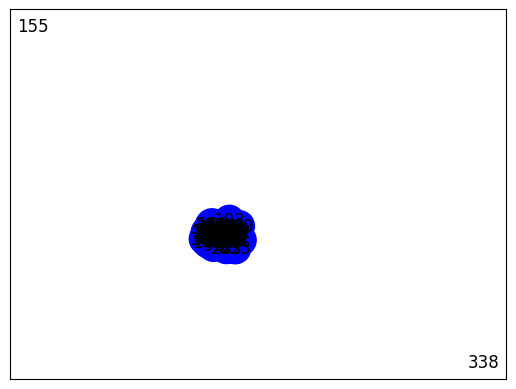

Closeness Centrality:
Node 0: 0.6667
Node 1: 0.6071
Node 2: 0.8058
Node 3: 0.6618
Node 4: 0.8190
Node 5: 0.5796
Node 6: 0.7986
Node 7: 0.6493
Node 8: 0.6914
Node 9: 0.6162
Node 10: 0.6657
Node 11: 0.5074
Node 12: 0.7022
Node 13: 0.6747
Node 14: 0.7685
Node 15: 0.6914
Node 16: 0.7405
Node 17: 0.7430
Node 18: 0.8205
Node 19: 0.5693
Node 20: 0.8000
Node 21: 0.6819
Node 22: 0.6240
Node 23: 0.6687
Node 24: 0.7442
Node 25: 0.5565
Node 26: 0.7168
Node 27: 0.7929
Node 28: 0.7405
Node 29: 0.7214
Node 30: 0.6707
Node 31: 0.4989
Node 32: 0.6502
Node 33: 0.7764
Node 34: 0.6540
Node 35: 0.7297
Node 36: 0.8312
Node 37: 0.7123
Node 38: 0.6512
Node 39: 0.4967
Node 40: 0.8517
Node 41: 0.6205
Node 42: 0.6924
Node 43: 0.7568
Node 44: 0.5736
Node 45: 0.7874
Node 46: 0.6914
Node 47: 0.5803
Node 48: 0.6957
Node 49: 0.6627
Node 50: 0.6687
Node 51: 0.5849
Node 52: 0.7273
Node 53: 0.8583
Node 54: 0.7860
Node 55: 0.6137
Node 56: 0.8029
Node 57: 0.7369
Node 58: 0.6717
Node 59: 0.7285
Node 60: 0.7738
Node 61: 0.6

In [ ]:
#membuat grafik berarah (Directed Graph - DiGraph) yang merepresentasikan hubungan antara kalimat-kalimat dalam teks berdasarkan kemiripan (cosine similarity)
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality
print("Closeness Centrality:")
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: {closeness:.4f}")
